## Observations and Insights 

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results,how = 'left', on="Mouse ID")
mouse_study2 = mouse_study[(mouse_study['Drug Regimen']  == "Capomulin")|(mouse_study['Drug Regimen']  == 'Infubinol')|(mouse_study['Drug Regimen']  == 'Ketapril') |(mouse_study['Drug Regimen']  == 'Placebo')]


In [9]:
# Display the data table for preview
mouse_study2.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_id = study_results.loc[study_results.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_results = study_results[study_results['Mouse ID'].isin(dup_mouse_id)==False]
clean_mouse_study2 = mouse_study2[mouse_study2['Mouse ID'].isin(dup_mouse_id)==False]

#combine the dataframes using Mouse ID
combined_data = pd.merge(clean_study_results, clean_mouse_study2, on = "Mouse ID")

In [12]:
# Display clean data
combined_data.head()


,Mouse ID,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,b128,0,45.0,0,Capomulin,Female,9,22,0,45.000000,0
1,b128,0,45.0,0,Capomulin,Female,9,22,5,45.651331,0
2,b128,0,45.0,0,Capomulin,Female,9,22,10,43.270852,0
3,b128,0,45.0,0,Capomulin,Female,9,22,15,43.784893,0
4,b128,0,45.0,0,Capomulin,Female,9,22,20,42.731552,0


## Summary Statistics

In [16]:
#Create inital summary table with Drug Regimes and counts
summary_data = pd.DataFrame(combined_data.groupby("Drug Regimen").count())

#Use groupby to create summary stats by drug regime, add results into columns in summarystats

summary_data["Mean"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)_y"].mean())
summary_data["Median"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)_y"].median())
summary_data["Standard Deviation"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)_y"].std())
summary_data["Variance"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)_y"].var())
summary_data["SEM"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)_y"].sem())

#Clean up columns, just keeping a count column for some of the graphs below
summary_data = summary_data[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

#Rename count column
summary_data = summary_data.rename(columns = {"Mouse ID" : "Trials"})

#Print data
summary_data.head()

,Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,2214,40.642199,41.534097,4.986119,24.861380,0.105968
Infubinol,1472,53.634713,52.777870,6.599470,43.553000,0.172011
Ketapril,1670,55.873466,54.789768,8.296114,68.825509,0.203010
Placebo,1533,54.800399,52.818634,7.956550,63.306682,0.203214


## Bar and Pie Charts

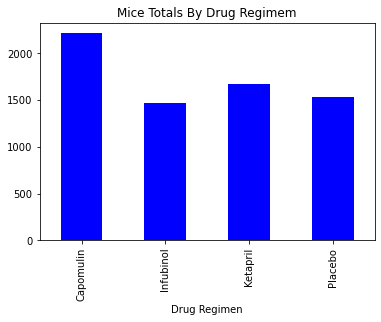

<Figure size 432x288 with 0 Axes>

In [19]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Filter the DataFrame
trt_mice = summary_data[["Trials"]]

# Use DataFrame.plot() in order to create a bar chart of the data
trt_mice.plot(kind="bar", figsize=(6,4), color = "b", legend=False)

# Set a title for the chart
plt.title("Mice Totals By Drug Regimem")

plt.show()
plt.tight_layout()


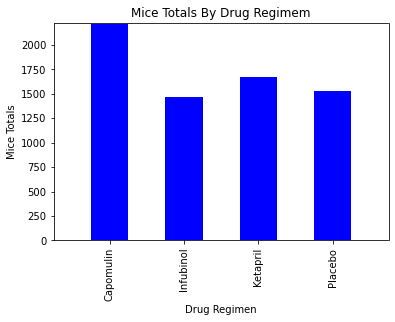

In [20]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(trt_mice))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.bar(x_axis, trt_mice["Trials"], color = "b", width = .5)
plt.xticks(tick_locations, trt_mice.index.values, rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(trt_mice["Trials"])+10)

# Set a Title and labels
plt.title("Mice Totals By Drug Regimem")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Totals")


# Save our graph and show the grap
plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
